# Jonathan Halverson
# Friday, April 22, 2016
# Handwritten digits

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [23]:
from sklearn.datasets import load_digits

digits = load_digits()
print digits['DESCR']

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

The data and targets are loaded below:

In [24]:
X = digits.data
y = digits.target

The raw data for the first image is displayed below:

In [25]:
imgs = digits.images
imgs[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

(-0.5, 7.5, 7.5, -0.5)

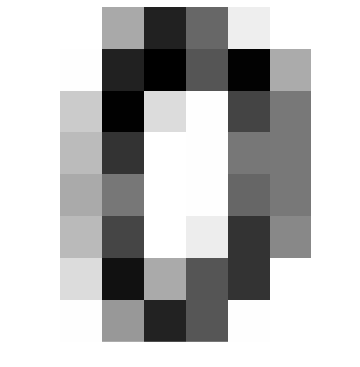

In [26]:
plt.imshow(imgs[0], cmap=plt.cm.binary, aspect='equal', interpolation='none')
plt.axis('off')

### Model tuning

Below logistic regression is used to build an optimized model for classification:

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = dict(C=np.logspace(-3, 3, base=10, num=15), penalty=['l1', 'l2'])
lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid, cv=10, scoring='accuracy').fit(X_train, y_train)

Store the predictions of the optimal model:

In [28]:
from sklearn.metrics import accuracy_score
y_pred = grid.best_estimator_.predict(X_test)
print accuracy_score(y_pred, y_test)

0.957777777778


Let's see which cases the model go wrong:

In [29]:
misclassified = []
wrong_right = []
for i, pred in np.ndenumerate(y_pred):
    if (pred != y_test[i]):
        misclassified.append(i[0])
        print pred, y_test[i]
        if (pred > y_test[i]): pred, y_test[i] = y_test[i], pred
        wrong_right.append((pred, y_test[i]))

4 7
1 7
7 9
1 6
1 8
5 9
8 9
9 5
1 8
3 2
6 1
8 9
7 4
8 1
2 8
2 3
1 8
9 3
5 8


In [32]:
from collections import Counter
Counter(wrong_right).most_common(3)

[((1, 8), 4), ((5, 9), 2), ((4, 7), 2)]

We see from the above that 1 and 8 is the most common misclassification. Here are the first six misclassified images:

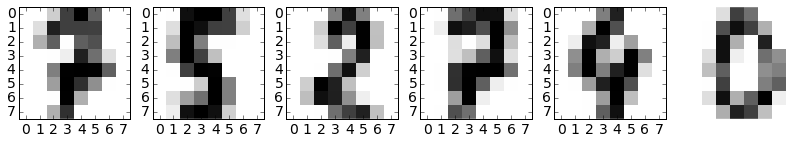

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(14, 6))
for i in range(6):
    axes[i].imshow(imgs[misclassified[i]], cmap=plt.cm.binary, aspect='equal', interpolation='none')